### 경고문구 무시

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 'Default.csv' 여부 확인 

In [ ]:
!ls -l

total 296
-rw-r--r-- 1 root root 296176 Aug 19 01:53 Default.csv
drwxr-xr-x 1 root root   4096 Jul 30 16:30 sample_data


### Pandas를 이용하여 Default.csv의 데이터 확인하기

In [ ]:
import pandas as pd

DF = pd.read_csv('Default.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


# 1. 탐색적 데이터 분석

  ## 1) Default 값의 빈도 분석

In [ ]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

  ## 2) 데이터 분포 시각화

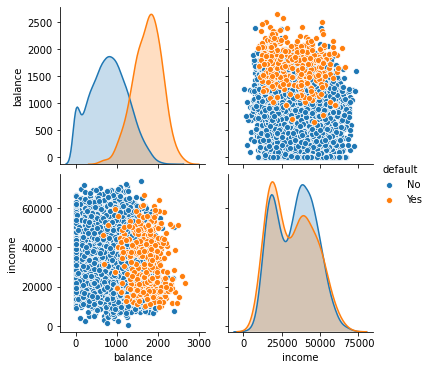

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'default', data = DF)
plt.show()

# 2. Data Processing

## 1) Student의 문자형 데이터를 숫자형 데이터로 변환하기

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()
encoder.fit(DF['student'])
VT = encoder.transform(DF['student'])
VT = VT.reshape(-1,)
DF['student'] = VT

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


## 2) Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

X = DF[['income', 'balance', 'student']]
y = DF['default']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

## 3) Train & Test Data Split

- 7 : 3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print(f'Train Data: {X_train.shape, y_train.shape}')
print(f'Test Data: {X_test.shape, y_test.shape}')

Train Data: ((7000, 3), (7000,))
Test Data: ((3000, 3), (3000,))


# 3. Modeling

## 1) Train_Data로 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(criterion = 'entropy')
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 2) Visualization

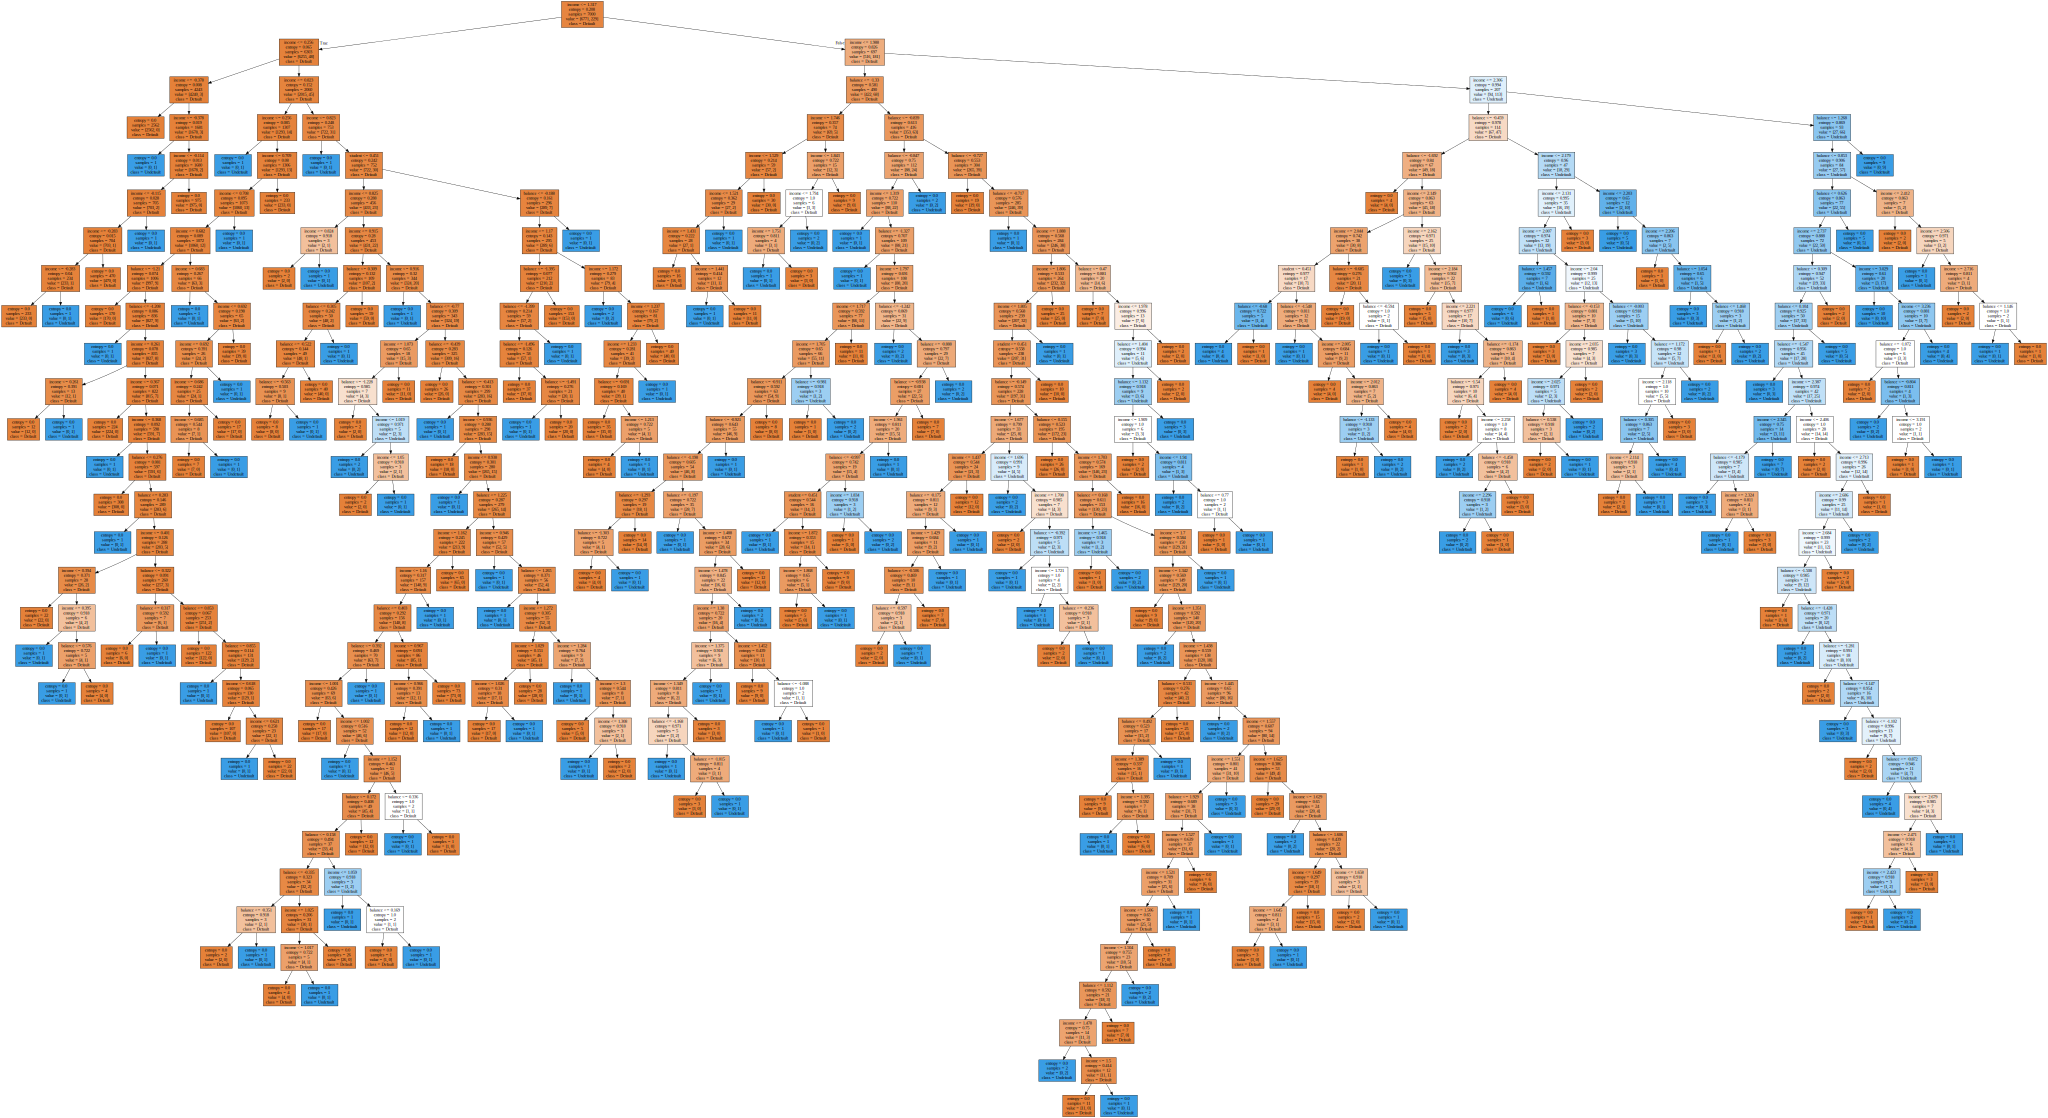

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['Default', 'Undefault']),
                                feature_names = (['balance', 'income', 'student']),
                                filled = True))

## 3) Test_Data에 Model 적용하기

In [ ]:
y_hat = Model_dt.predict(X_test)

## 4) Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2841,   55],
       [  63,   41]])

## 5) Accuracy, Precision, Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9606666666666667
0.4270833333333333
0.3942307692307692


## 6) F1_Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.41000000000000003

# 4. Pruning

## 1) Model Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 7, criterion = 'entropy')
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Pruning Model Visualization

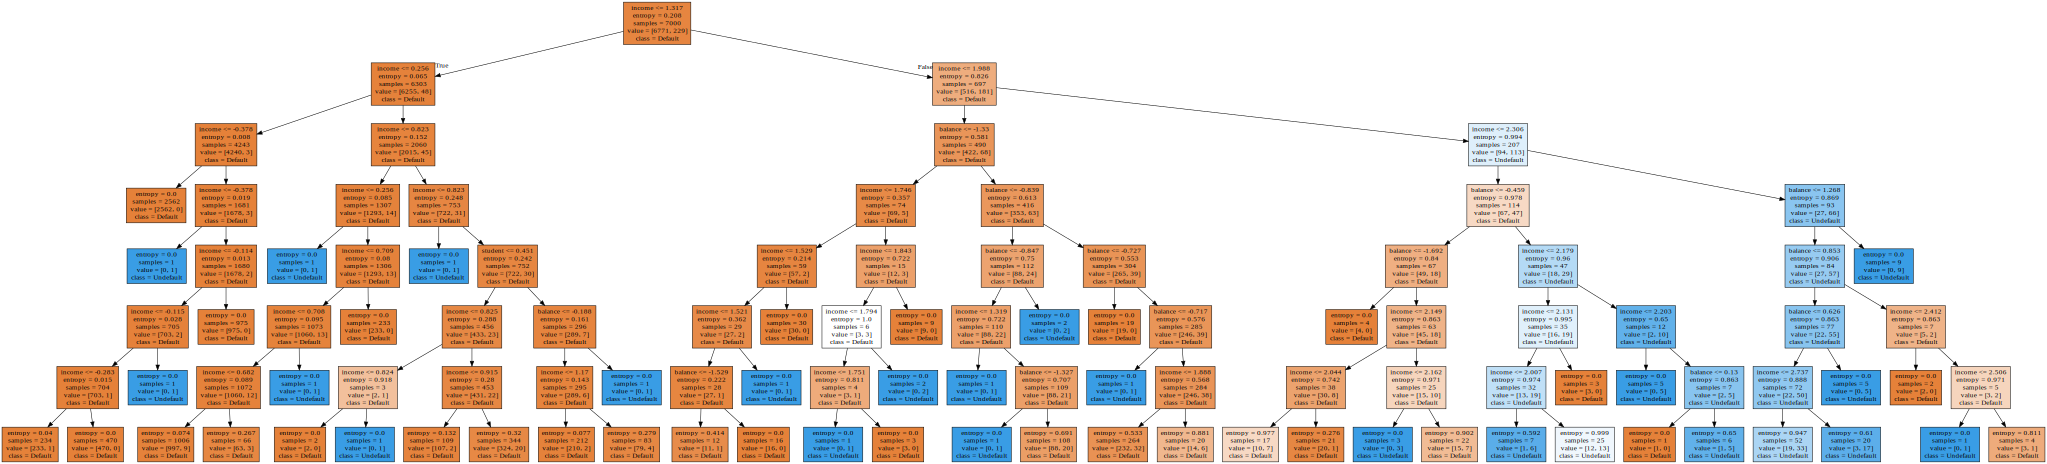

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['Default', 'Undefault']),
                                feature_names = (['balance', 'income', 'student']),
                                filled = True))

## 3) Model Evaluate

- Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_hat = Model_pr.predict(X_test)

print(confusion_matrix(y_test, y_hat))

[[2876   20]
 [  61   43]]


- Accuracy, Precision, Recall

In [ ]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.973
0.6825396825396826
0.41346153846153844


- F1 Score

In [ ]:
f1_score(y_test, y_hat, pos_label = 'Yes')

0.5149700598802395

# 5. Feature Importance

## 1) Feature Importance 값 확인

In [ ]:
Model_pr.feature_importances_

array([0.06375177, 0.93304784, 0.00320039])

## 2) Feature Importance 시각화

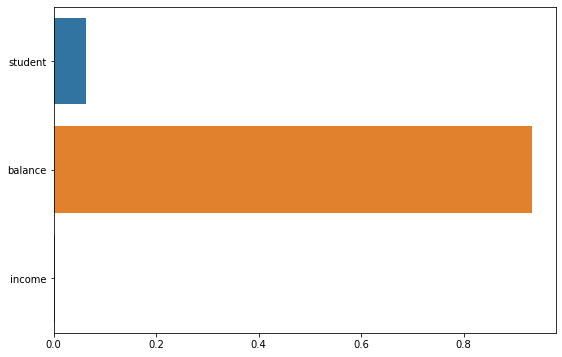

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_pr.feature_importances_,
            ['student', 'balance', 'income'])
plt.show()